In [21]:
!pip install git+https://github.com/georgegee23/Alphalytics.py

import alphalytics as alpha
print(dir(alpha))

  Cloning https://github.com/georgegee23/Alphalytics.py to c:\users\george.georgiev\appdata\local\temp\pip-req-build-mt2eytmi
  Resolved https://github.com/georgegee23/Alphalytics.py to commit 08864507a0aa606c70d70db3411b42047bc41448
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


  Running command git clone --filter=blob:none --quiet https://github.com/georgegee23/Alphalytics.py 'C:\Users\george.georgiev\AppData\Local\Temp\pip-req-build-mt2eytmi'


In [22]:
print(dir(alpha))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [23]:
import alphalytics.utils as autils
print(dir(autils))

ModuleNotFoundError: No module named 'alphalytics.utils'

In [24]:
import alphalytics
print(alphalytics.__file__)

None


In [ ]:
import pandas as pd

In [18]:
periods_per_year = 52

OUTLINE:

1. Factor Scores Analysis. 
    - Factor Scores Distribution: How the factors behave?
2. Quantile Performance Analysis:
    - Quantile Analyis: How have the factors quantiles performed historically? 
        - Quantiles Performance Summary.
        - Quantiles Risk & Return Statistics.
    - Quantile Correlation Analysis: How strong is the relationship between the different quantiles?  
3. Prediction Analysis:
    - Factor & Return Rank Correlation Analysis: Are factor scores and future returns correlated?
    - Factor Information Decay: How factor scores and returns correlated into the future?
    - Quantile Horizon Analysis: How far forward is the factor quantiles additive to performance? 
4. Turnover Analysis:
    - Autocorrelation: How correlated are current factor scores to future factor scores?
    - Temporal Volatility of Factor Quantiles: How volatile are factor quantiles through time?


#### PREPARE DATA

In [19]:
data_loc = "E:\\GG\\QuantLibs\\Data\\"
returns = pd.read_excel(data_loc+"202503_FactSet_Rets_10Y.xlsx", sheet_name="Values", index_col=0, parse_dates=True)
returns = returns.resample("W").last()
returns = returns / 100 # convert to %
prices = (returns + 1).cumprod()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2015-03-08 to 2025-03-02
Freq: W-SUN
Columns: 580 entries, 00090Q103 to Y8162K204
dtypes: float64(580)
memory usage: 2.3 MB


REMOVE OUTLIERS

In [20]:
cols_to_drop = alpha.detect_extreme_outliers(returns)
returns = returns.drop(columns = cols_to_drop)

AttributeError: module 'alphalytics' has no attribute 'detect_extreme_outliers'

In [ ]:
alpha.

CREATE FACTORS

In [ ]:
ramom = returns.rolling(52).mean() / returns.rolling(52).std()

## FACTOR SCORE ANALYSIS

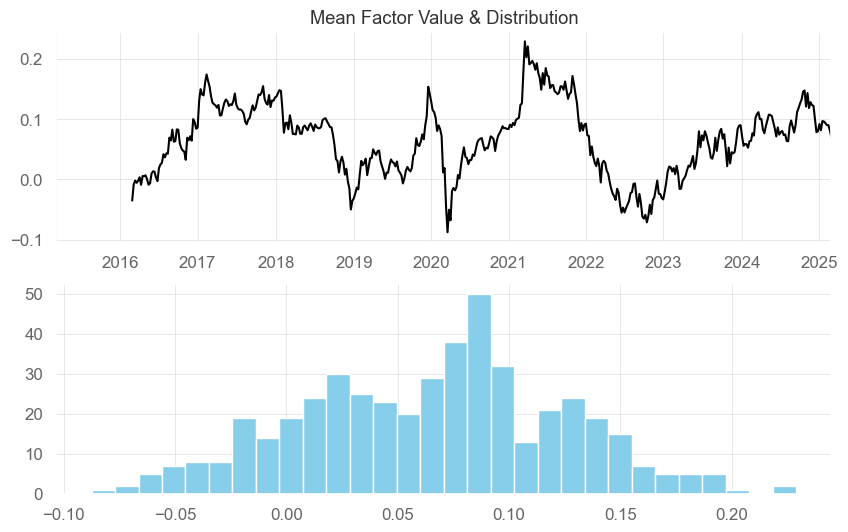

In [ ]:
alpha.plot_factor_data(ramom)

NORMALIZE FACTOR VALUES

In [ ]:
# Rank factors into percentile by row (cross sectional)
factors = ramom.rank(axis =1, pct=True) 

## QUANTILE PERFORMANCE ANALYSIS

In [ ]:
quantiles = alpha.to_quantiles(factors, 10)
quantiles

,00090Q103,002824100,00287Y109,00326A104,00486H105,00534A102,00724F101,007903107,008492100,009066101,...,M98068105,N00985106,N53745100,N62509109,N82405106,N97284108,V7780T103,Y2573F102,Y2685T131,Y8162K204
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-02,5.0,6.0,5.0,10.0,7.0,1.0,1.0,1.0,8.0,2.0,...,9.0,7.0,1.0,5.0,1.0,7.0,10.0,9.0,2.0,1.0
2025-02-09,5.0,6.0,5.0,10.0,8.0,5.0,1.0,1.0,9.0,2.0,...,8.0,8.0,1.0,4.0,1.0,7.0,10.0,8.0,1.0,1.0
2025-02-16,5.0,6.0,5.0,10.0,8.0,5.0,2.0,1.0,9.0,4.0,...,9.0,8.0,1.0,4.0,1.0,8.0,10.0,8.0,2.0,1.0


In [ ]:
quantile_returns = alpha.compute_quantile_returns(quantiles, returns, 1)
quantile_returns

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
Date,,,,,,,,,,
2016-03-06,0.181256,0.104177,0.044066,0.050462,0.048557,0.029823,0.024407,0.021777,0.014178,0.005577
2016-03-13,0.011574,0.009360,0.008820,0.007540,-0.001962,0.015861,0.006927,0.010490,0.007081,0.008225
2016-03-20,-0.001221,0.026335,0.024037,0.026206,0.021256,0.014010,0.015795,0.011628,0.023327,0.017449
2016-03-27,-0.023028,-0.028074,-0.025412,-0.014024,-0.021597,-0.012884,-0.016133,-0.012347,-0.008737,-0.000767
2016-04-03,0.021924,0.022156,0.014308,0.011737,0.018257,0.024898,0.023538,0.021794,0.021897,0.024575
...,...,...,...,...,...,...,...,...,...,...
2025-02-02,-0.012568,-0.003873,-0.007103,-0.002089,-0.015332,-0.008033,-0.016802,-0.021305,-0.032959,-0.018494
2025-02-09,0.046086,-0.018083,0.007767,-0.003641,-0.012221,0.005386,0.013580,0.018088,0.008185,0.013618
2025-02-16,0.019056,-0.000188,0.016551,0.014391,-0.000514,0.019569,0.011657,-0.001086,0.008952,0.010101


#### QUANTILE PERFORMANCE SUMMARY

In [ ]:
alpha.compute_performance_table(quantile_returns, periods_per_year=periods_per_year)

,3M,6M,1-Year,3-Year,5-Year,10-Year,SI
Q1,0.133012,0.260785,0.239637,0.157920,0.182858,0.158236,0.153775
Q2,-0.021428,0.065309,0.137827,0.056989,0.128346,0.095630,0.092189
Q3,0.004179,0.062279,0.130491,0.076591,0.146471,0.112929,0.111173
Q4,0.234850,0.368521,0.356294,0.133584,0.146263,0.105305,0.103230
Q5,-0.036244,0.065089,0.192923,0.090480,0.100286,0.076884,0.073964
Q6,0.026347,0.092520,0.151671,0.087154,0.132038,0.117252,0.115625
Q7,-0.039537,0.073144,0.058827,0.055096,0.124821,0.103859,0.102718
Q8,0.019194,0.146346,0.225131,0.145614,0.179546,0.143990,0.141962
Q9,-0.031718,0.092323,0.122782,0.099088,0.166042,0.144555,0.143014
Q10,0.010228,0.224783,0.273115,0.188681,0.210164,0.180448,0.178348


#### QUANTILE RISK & RETURN STATISTICS

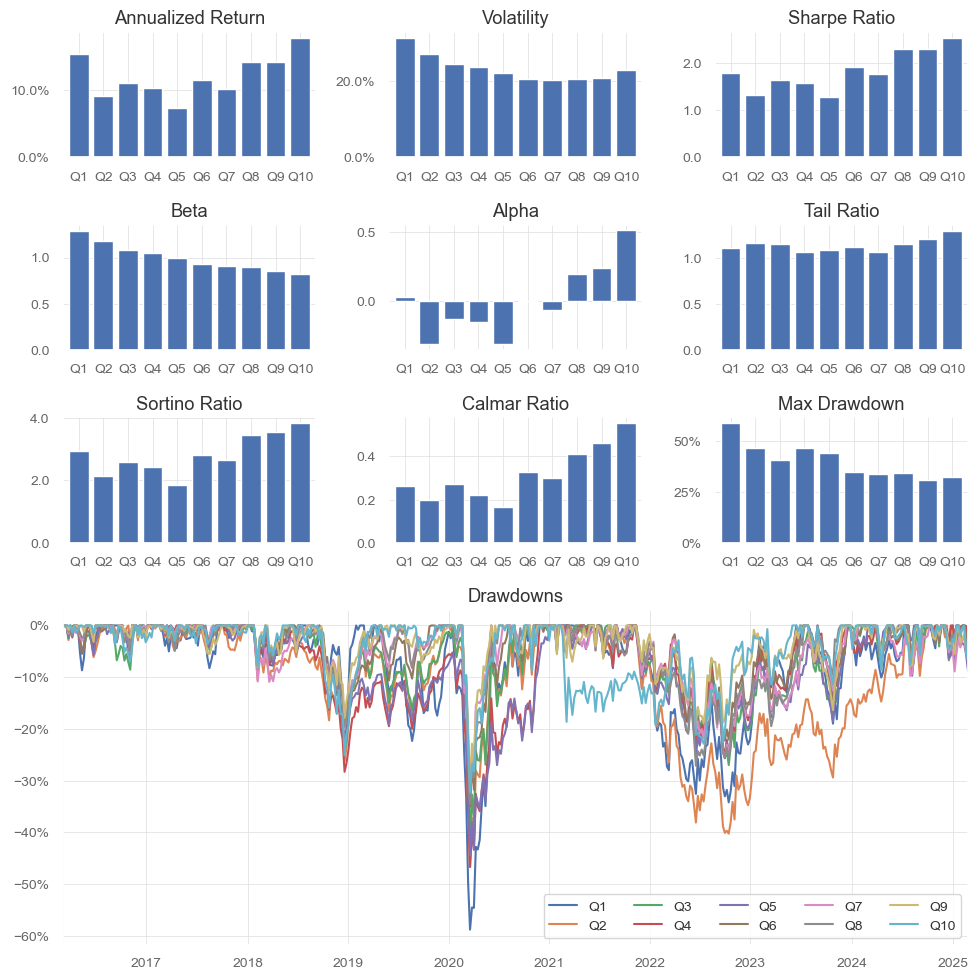

In [ ]:
alpha.plot_quantiles_risk_metrics(quantile_returns, periods_per_year=52)

Quantiles are created taking the daily factor values distribution and split it into equal-sized buckets based on their values. The idea behind quantiles is that grouping stocks helps to increase the signal-to-noise ratio.

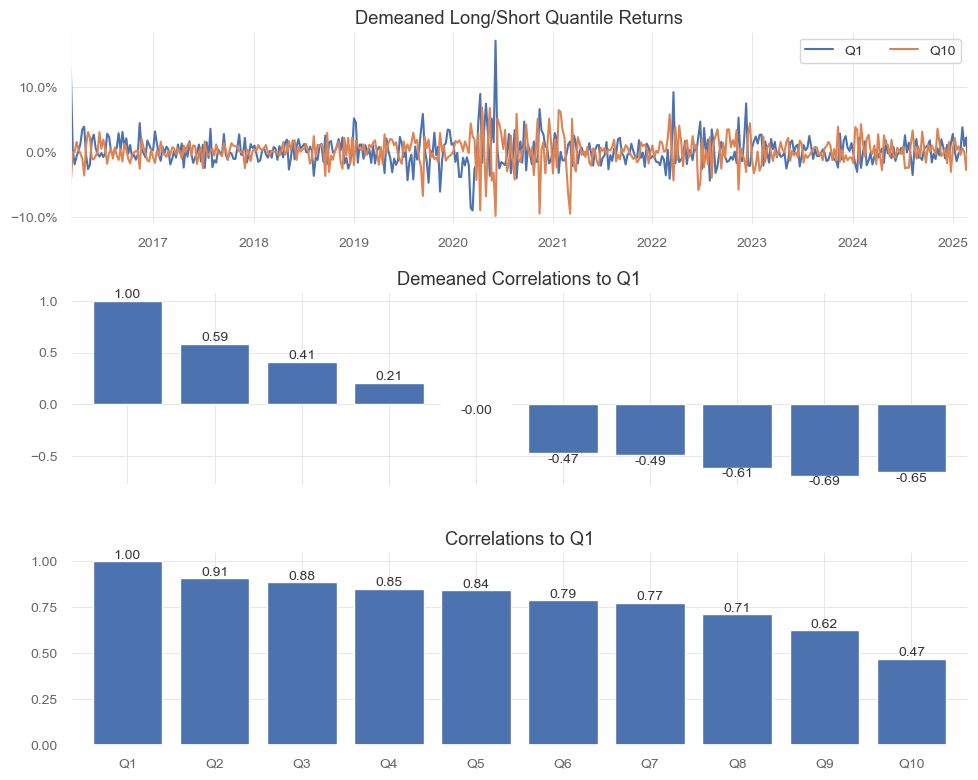

In [ ]:
alpha.plot_quantile_correlations(quantile_returns)

## PREDICTIVE ANALYSIS

#### INFORMATION COEFFICIENT ANALYSIS

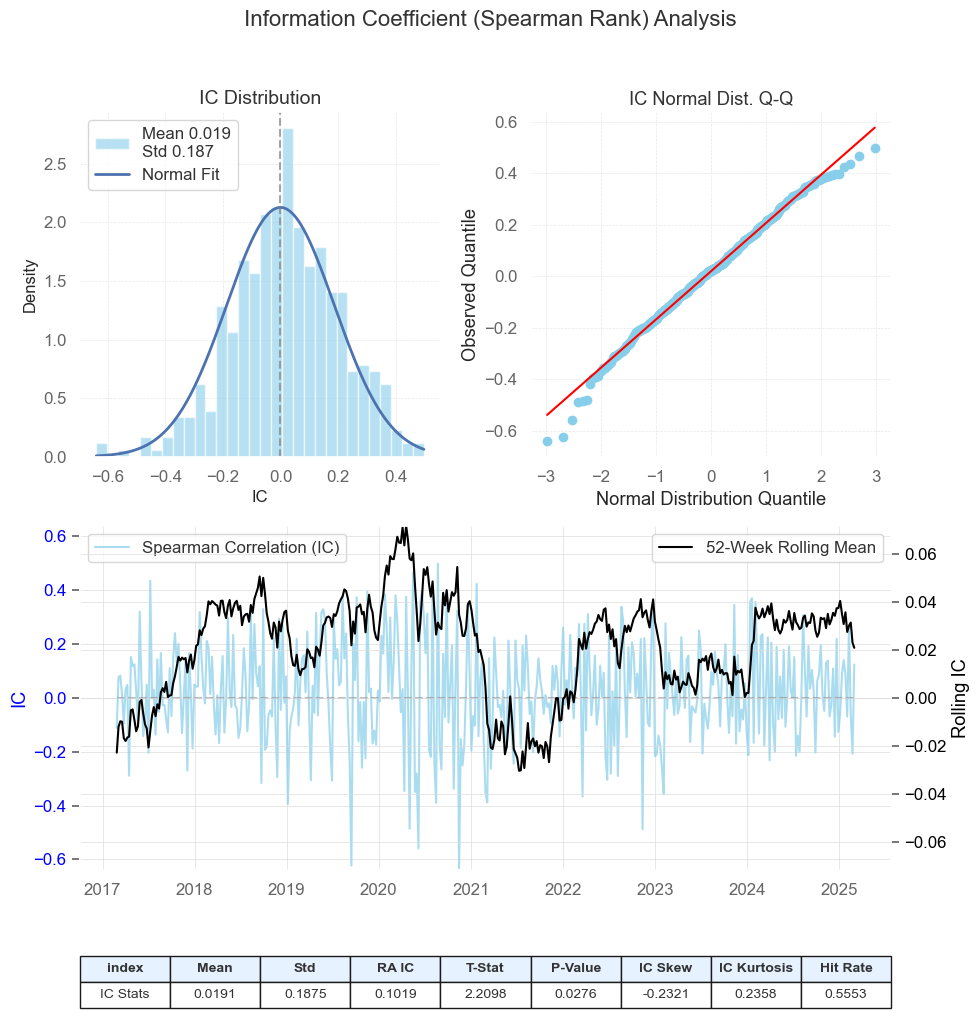

(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: title={'center': 'IC Distribution'}, xlabel='IC', ylabel='Density'>,
        <Axes: title={'center': 'IC Normal Dist. Q-Q'}, xlabel='Normal Distribution Quantile', ylabel='Observed Quantile'>,
        <Axes: ylabel='IC'>], dtype=object))

In [ ]:
alpha.plot_ic_summary(factors, returns, window=52, factor_lag=1, periods_label="Weeks")

In the histogram plots we see the daily IC distribution, which makes easy to check for consistency over time. We would like to see a positive mean IC and above the standard deviation.

The QQ plot compares the distribution of the IC to the normal distribution. This is useful for assessing if the IC is normally distributed or not. If the factor is predictive the IC distribution can't be normally distributed, what we want to see here is an S-shaped curve. This indicates that the tails of the IC distribution are fatter and contain more information.

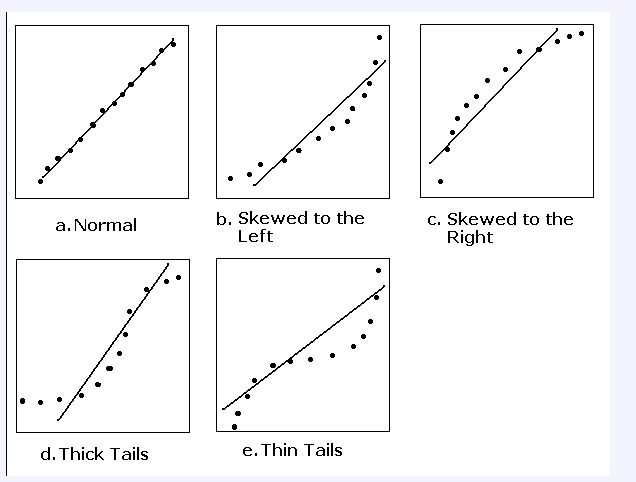

#### FACTOR INFORMATION DECAY

This analysis helps quantitative investors:

- Determine how quickly factor signals decay
- Identify optimal rebalancing frequencies
- Understand the time horizon over which a factor has predictive power
- Compare different factors' persistence
- Construct multi-factor portfolios with complementary decay patterns

A stronger factor would show higher absolute IC values with p-values below 0.05, indicating statistically significant predictive power. The decay pattern would reveal how quickly that predictive ability diminishes over time.

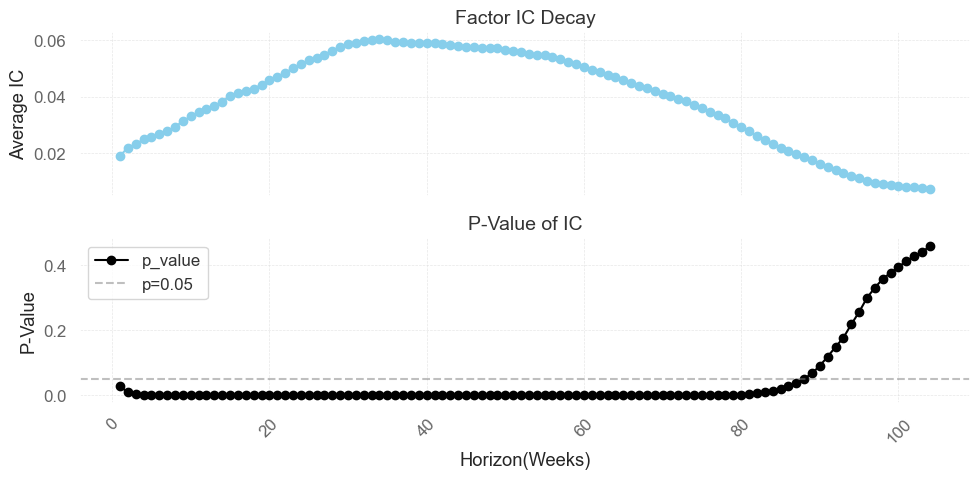

In [ ]:
alpha.plot_factor_decay(factors, returns, 104, "Weeks")

FIND OPTIMAL WINDOW FOR MOMENTUM FACTOR

,79,80,78,76,94,75,77,81,74,87,73,92,83,93,84,88,97,82,98,99
SpearmanR,0.023555,0.023256,0.023113,0.022662,0.022352,0.02233,0.022216,0.022206,0.022138,0.02203,0.021973,0.021955,0.021899,0.021884,0.021873,0.021861,0.021847,0.021761,0.021723,0.021685


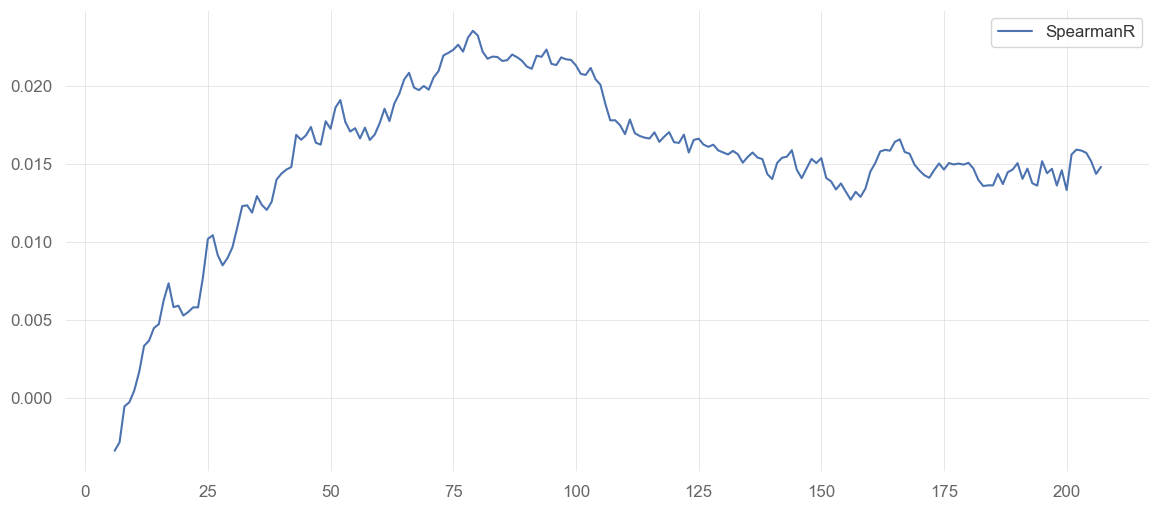

In [ ]:
lag = 1
percentile_windows = range(6,208)

windows_dict = {}
for window in percentile_windows:
    
    raw_factor = returns.rolling(window).mean() / returns.rolling(window).std()
    factor_percentiles = raw_factor.rank(axis =1, pct=True)

    factors_lagged = factor_percentiles.shift(lag)
    ts_spearmanr_df = alpha.cross_sectional_spearmanr(factors_lagged, returns).dropna()
    windows_dict[window] = ts_spearmanr_df["SpearmanR"].mean()

windows_df = pd.DataFrame.from_dict(windows_dict, orient="index", columns = ["SpearmanR"])
windows_df.plot(figsize = (14,6))
windows_df.sort_values(by = ["SpearmanR"], ascending=False).head(20).T

#### QUANTILE HORIZON ANALYSIS

In [ ]:
alpha.fwd_quantile_stats(returns, quantiles, 26)

,Return,Risk-Adjusted Return
Q1,0.091043,0.446657
Q2,0.086747,0.478228
Q3,0.076552,0.469873
Q4,0.073690,0.493628
Q5,0.079537,0.540076
Q6,0.086685,0.521139
Q7,0.091763,0.625335
Q8,0.095507,0.602528
Q9,0.114819,0.742097
Q10,0.126781,0.876392


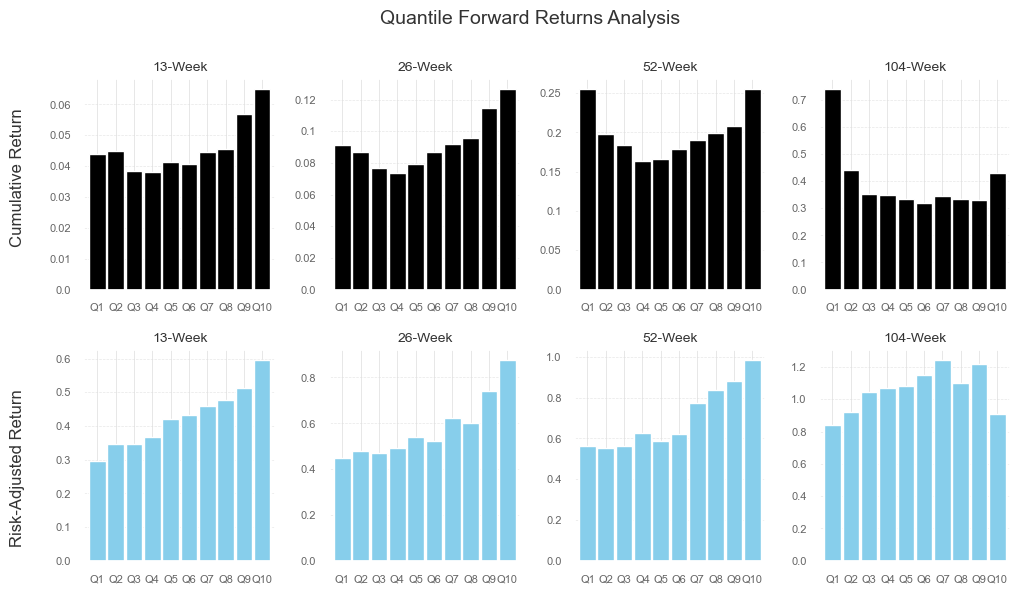

In [ ]:
alpha.plot_forward_returns(returns, quantiles, [13, 26, 52, 104], "Week")

## TURNOVER ANALYSIS

#### FACTOR AUTOCORRELATION

c:\Users\george.georgiev\AppData\Local\miniconda3\envs\AlphalyticsPy\lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\george.georgiev\AppData\Local\miniconda3\envs\AlphalyticsPy\lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: title={'center': 'Factor Autocorrelation'}, xlabel='Lags', ylabel='Autocorrelation'>

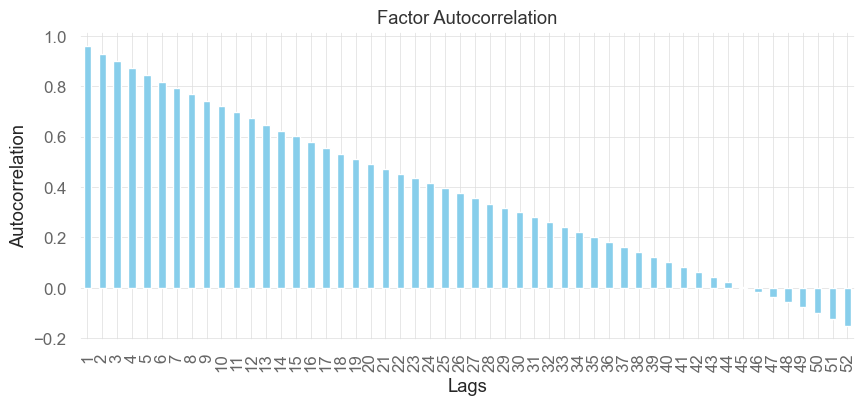

In [ ]:
auto_corrs_ts = alpha.compute_factor_autocorr(factors, 53)
auto_corrs_ts.plot(kind = "bar", title = "Factor Autocorrelation", xlabel="Lags", ylabel="Autocorrelation", figsize=(10,4), color='skyblue')

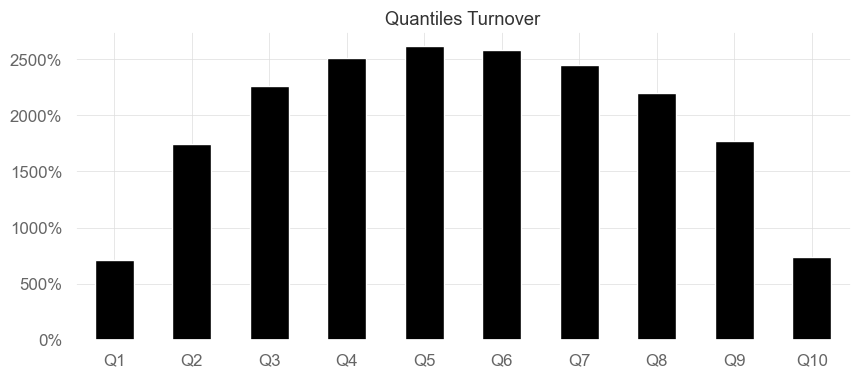

In [ ]:
alpha.plot_quantiles_annual_turnover(quantiles, 52)